# Лекция 8

In [33]:
import numpy as np
import pandas as pd
import matplotlib as matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## Трёхмерные точки и линии

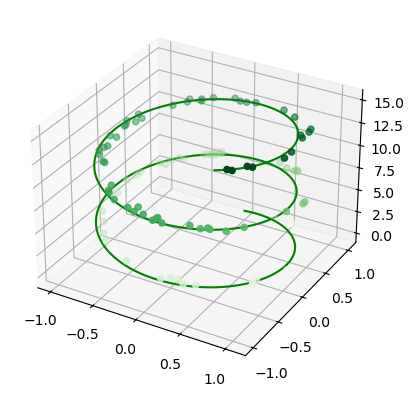

In [8]:
fig = plt.figure()
ax = plt.axes(projection='3d')

z1 = np.linspace(0, 15, 1000)
y = np.cos(z1)
x = np.sin(z1)

ax.plot3D(x, y, z1, 'green')

z2 = 15 * np.random.random(100)
y2 = np.cos(z2) + 0.1 * np.random.random(100)
x2 = np.sin(z2) + 0.1 * np.random.random(100)

ax.scatter3D(x2, y2, z2, c=z2, cmap='Greens')

In [9]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

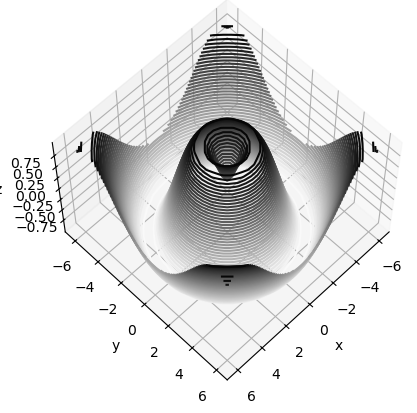

In [17]:
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.contour(X, Y, Z, 40, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(60, 45)

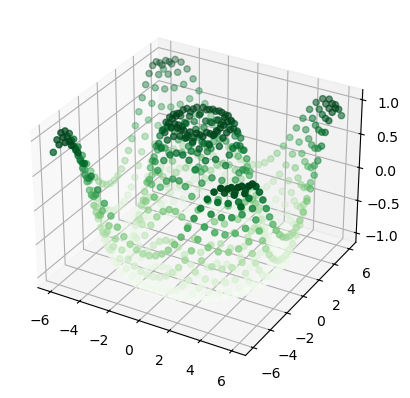

In [19]:
ax = plt.axes(projection='3d')
ax.scatter3D(X, Y, Z, c=Z, cmap='Greens')

## Каркасный

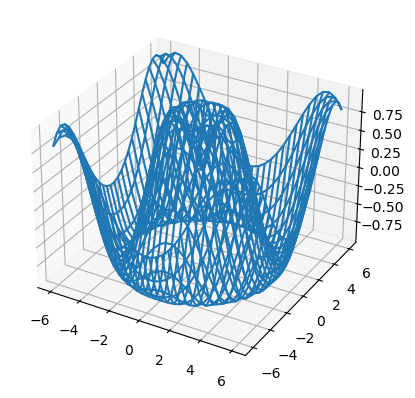

In [22]:
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z)

## Поверхностный

Text(0.5, 0.92, 'Example')

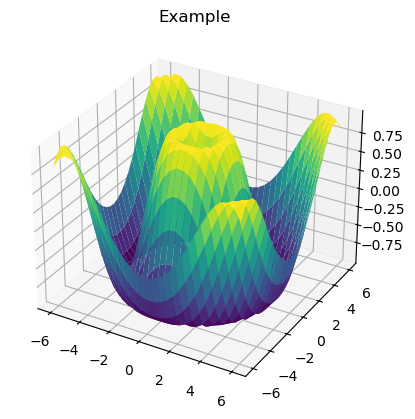

In [24]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.set_title('Example')

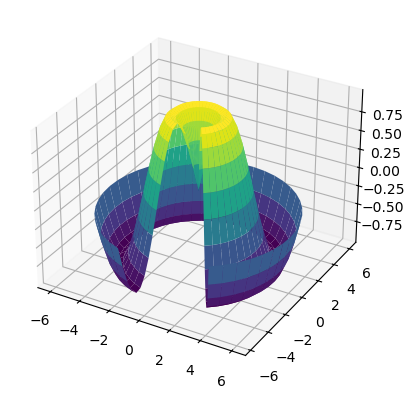

In [26]:
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
R, Theta = np.meshgrid(r, theta)
X = r * np.sin(Theta)
Y = r * np.cos(Theta)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')

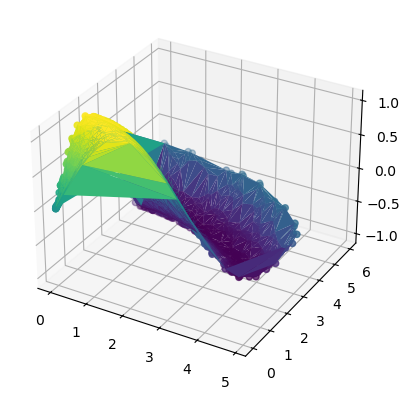

In [30]:
theta = 2 * np.pi + np.random.random(1000)
r = 6 * np.random.random(1000)

x = r * np.sin(theta)
y = r * np.cos(theta)
z = f(x, y)

ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis')
ax.plot_trisurf(x, y, z, cmap='viridis')

# Seaborn:
# - DataFrame (Matplotlib с Pandas)
# - более высокоуровневый

In [37]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

data.head()

,x,y
0,2.515152,2.162446
1,0.349523,-0.310284
2,-1.210629,-0.421047
3,0.103582,1.046133
4,-1.269053,-0.750624


(array([ 17.,  57., 159., 341., 505., 434., 293., 142.,  44.,   8.]),
 array([-4.34614318, -3.45257506, -2.55900694, -1.66543882, -0.77187071,
         0.12169741,  1.01526553,  1.90883364,  2.80240176,  3.69596988,
         4.589538  ]),
 <BarContainer object of 10 artists>)

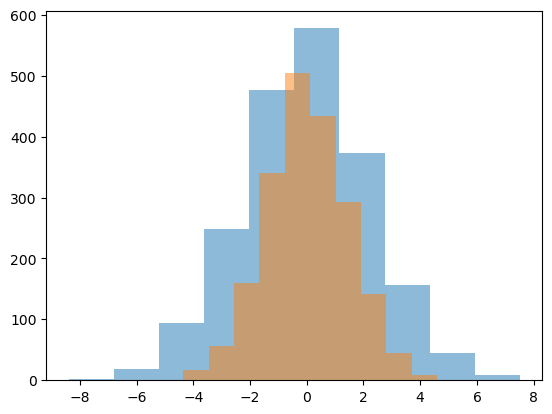

In [38]:
plt.hist(data['x'], alpha=0.5)
plt.hist(data['y'], alpha=0.5)

C:\Users\aponc\AppData\Local\Temp\ipykernel_21240\3449263925.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, shade=True)


<Axes: ylabel='Density'>

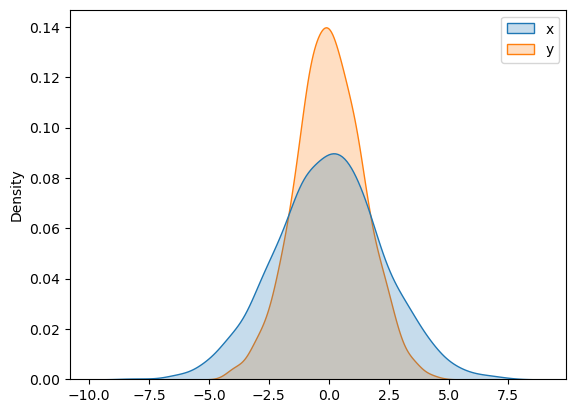

In [41]:
sns.kdeplot(data=data, shade=True)

In [43]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


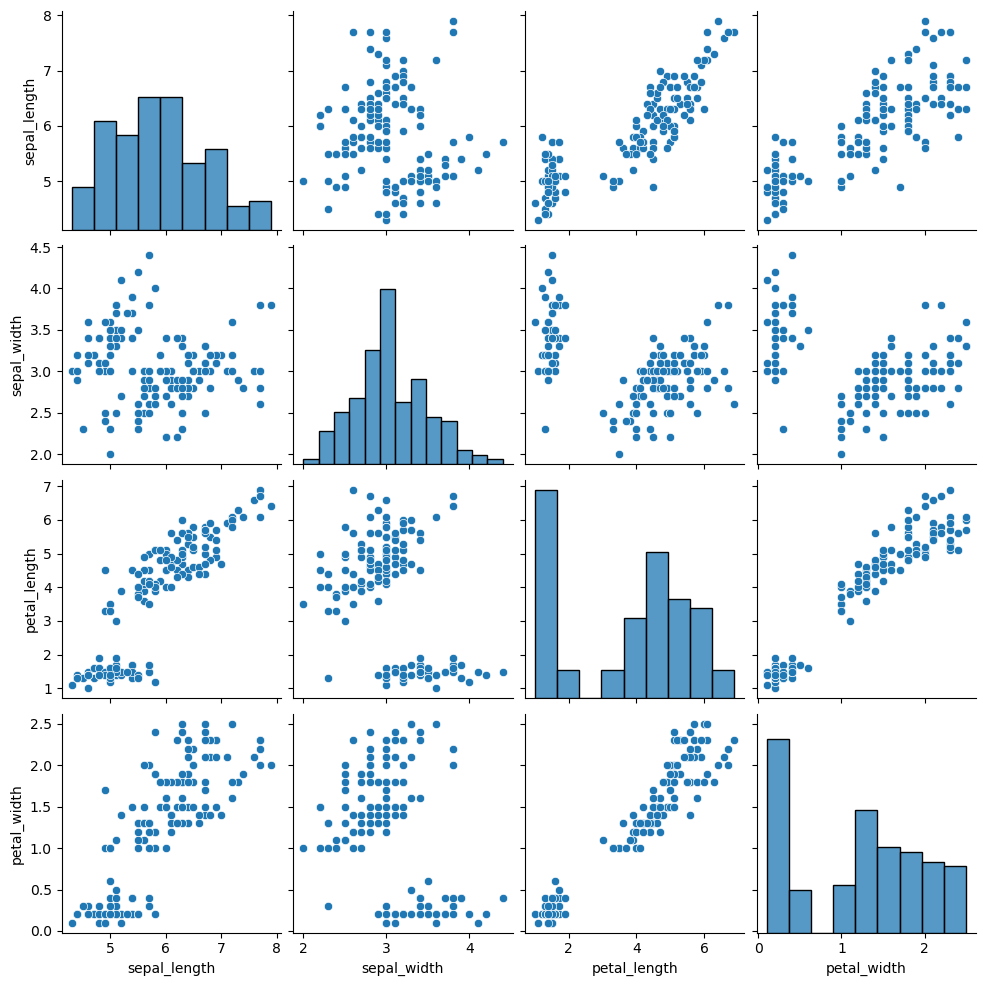

In [46]:
sns.pairplot(iris)

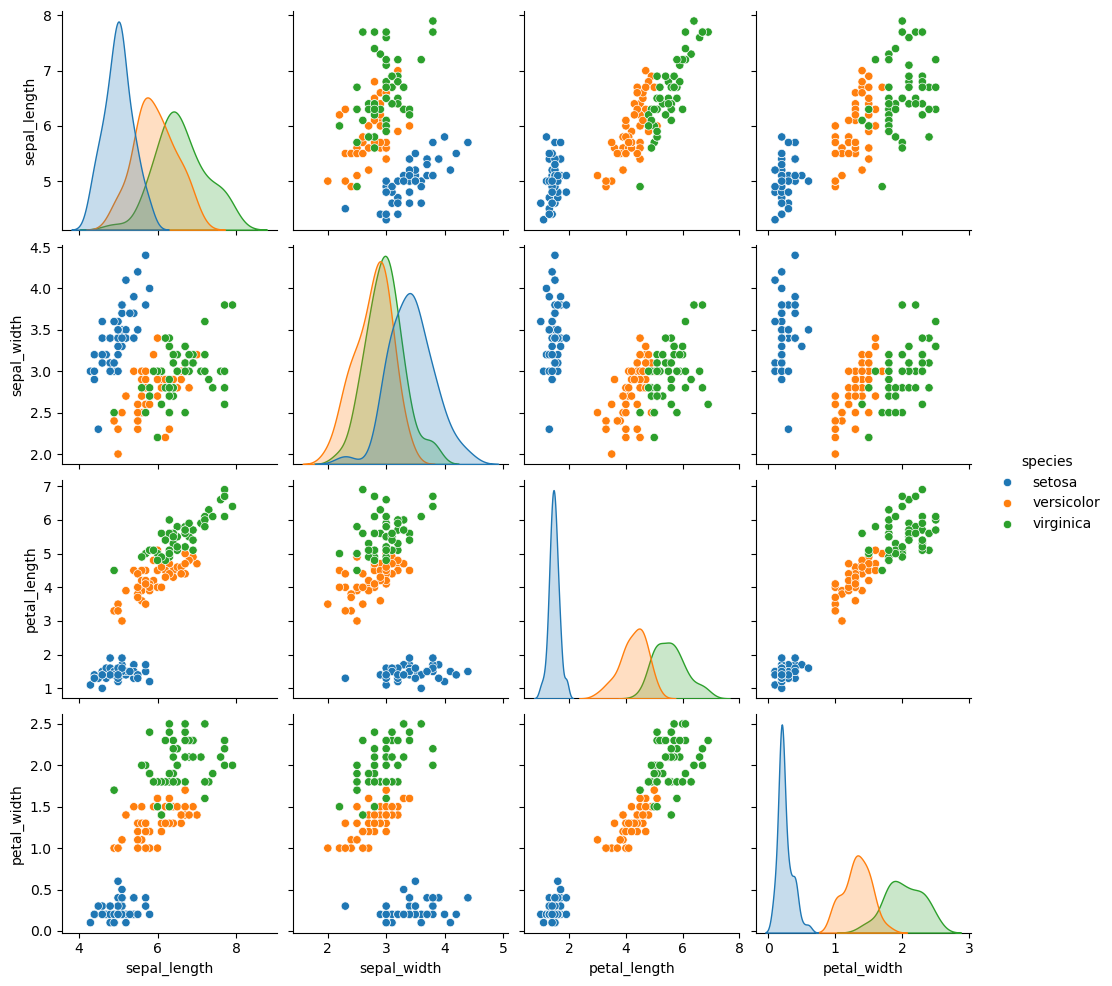

In [47]:
sns.pairplot(iris, hue='species')

In [48]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Гистограммы

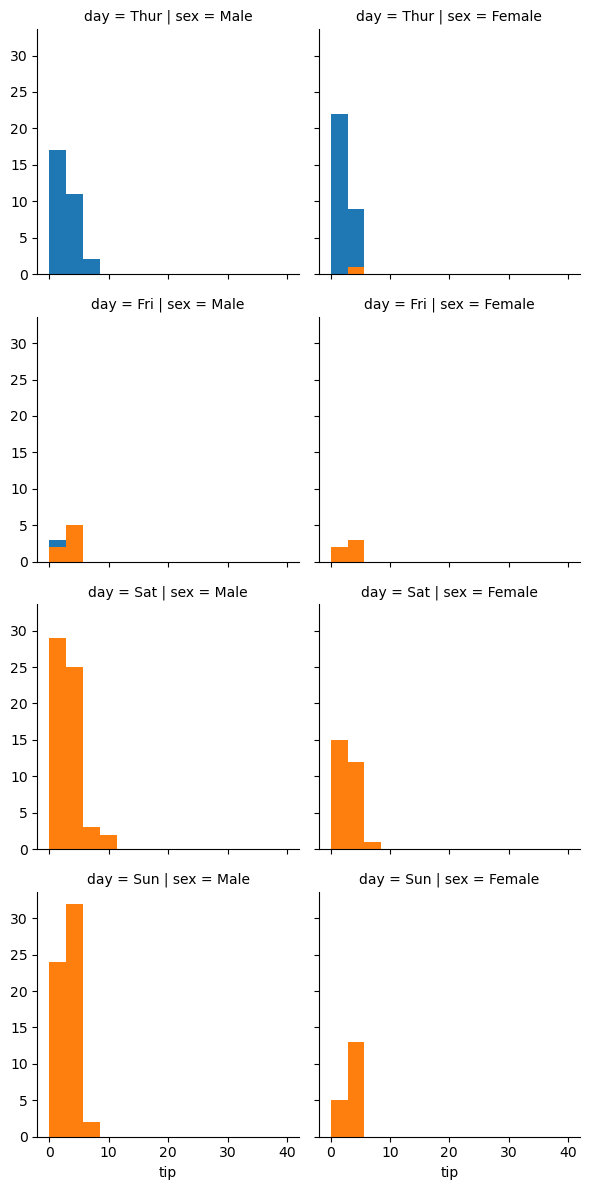

In [54]:
grid = sns.FacetGrid(tips, row='day', col='sex', hue='time')
grid.map(plt.hist, 'tip', bins=np.linspace(0, 40, 15))

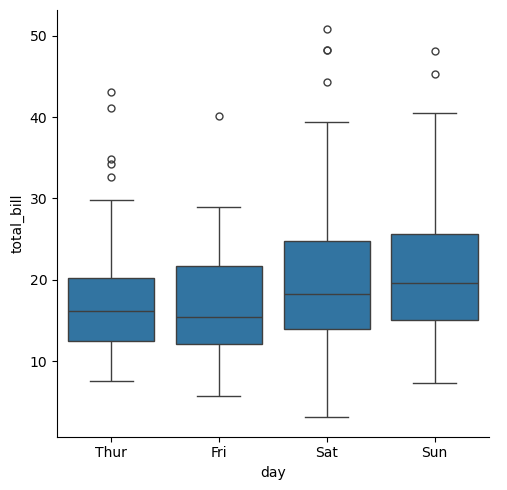

In [56]:
sns.catplot(data=tips, x='day', y='total_bill', kind='box')

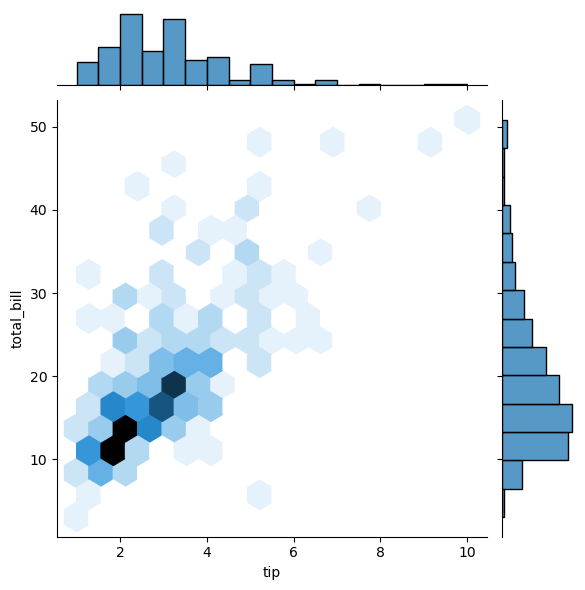

In [58]:
sns.jointplot(data=tips, x='tip', y='total_bill', kind='hex')

In [59]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


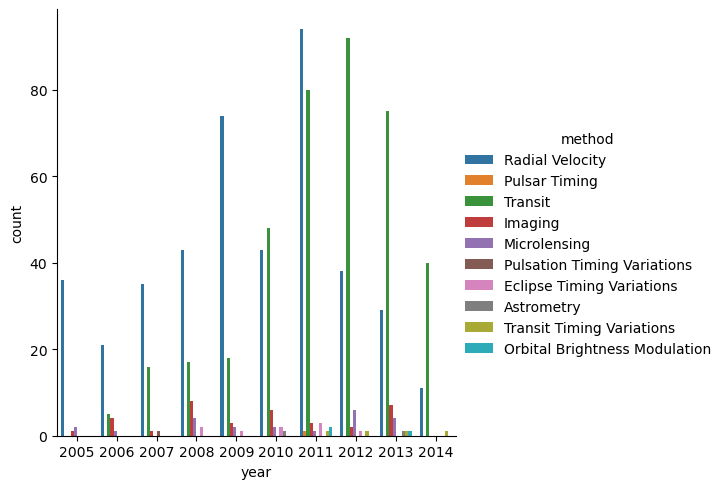

In [63]:
sns.catplot(data=planets, x='year', kind='count', hue='method', order=range(2005, 2015))

## Сравнение числовых данных

### Числовые пары

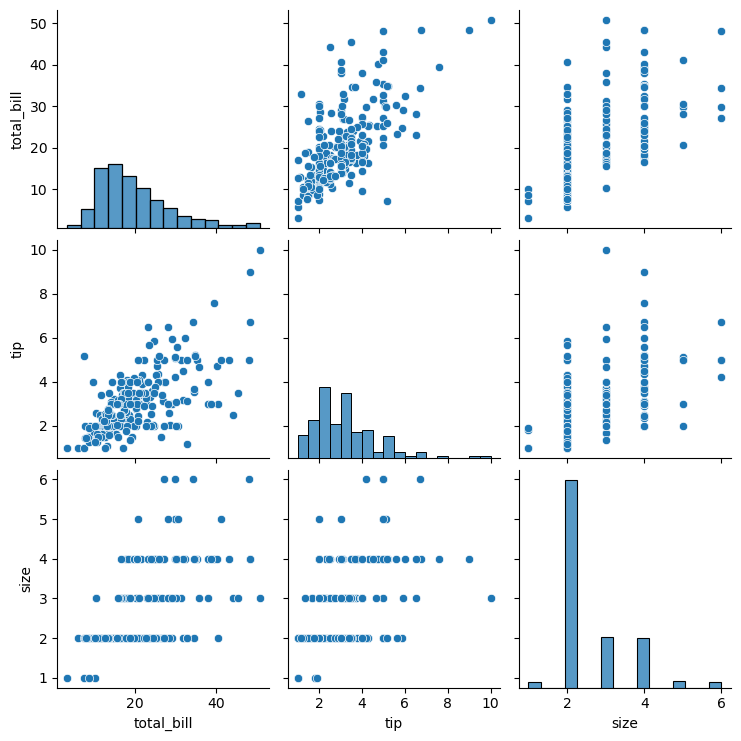

In [64]:
sns.pairplot(tips)

### Тепловые карты

<Axes: >

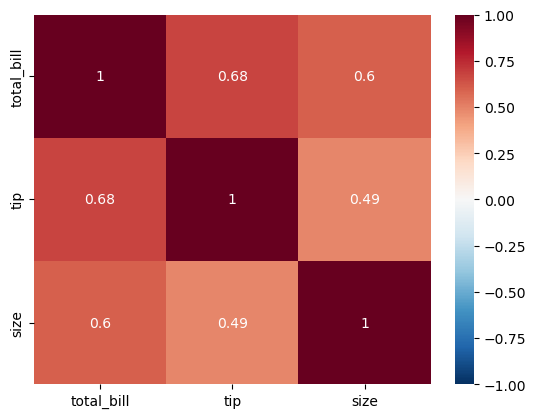

In [66]:
tips_corr = tips[['total_bill', 'tip', 'size']]
sns.heatmap(tips_corr.corr(), cmap='RdBu_r', annot=True, vmin=-1, vmax=1)

#### 0 - независимы
#### 1 - положительная
#### -1 - отрицательная

### Диаграмма рассеяния

<Axes: xlabel='total_bill', ylabel='tip'>

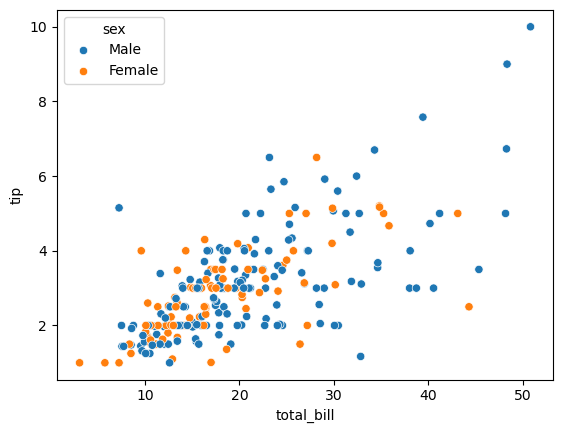

In [68]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='sex')

<Axes: xlabel='total_bill', ylabel='tip'>

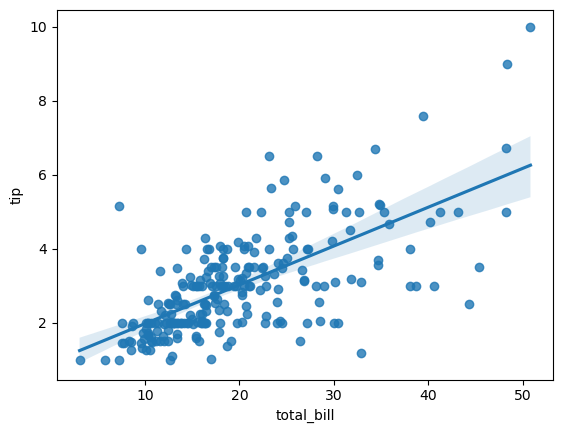

In [71]:
sns.regplot(data=tips, x='total_bill', y='tip')

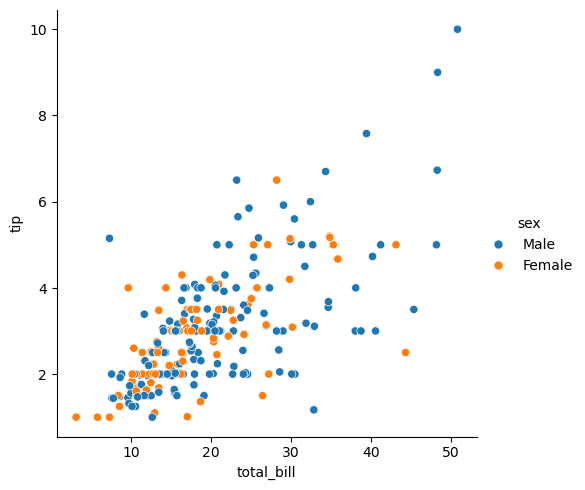

In [73]:
sns.relplot(data=tips, x='total_bill', y='tip', hue='sex')

### Линейный график

<Axes: xlabel='total_bill', ylabel='tip'>

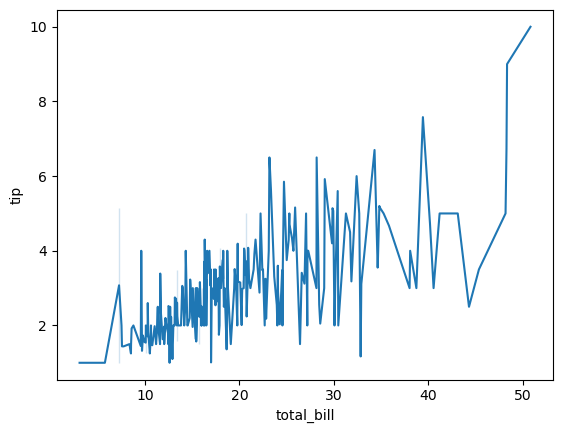

In [74]:
sns.lineplot(data=tips, x='total_bill', y='tip')

### Сводная диаграмма

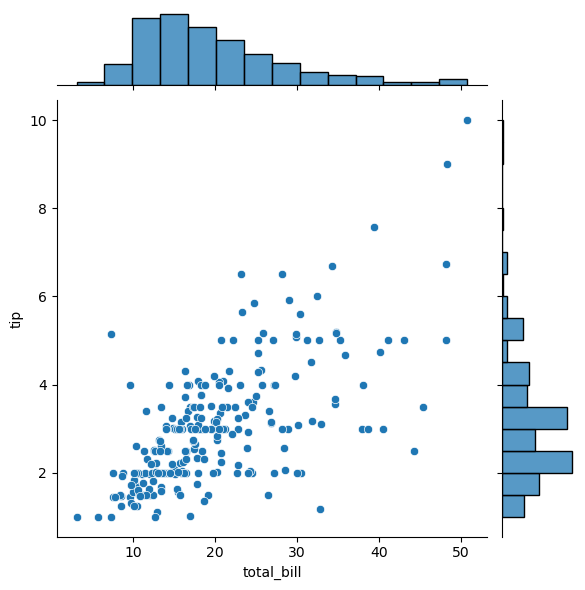

In [75]:
sns.jointplot(data=tips, x='total_bill', y='tip')

## Сравнение числовых и категориальных данных

### Гистограмма

<Axes: xlabel='day', ylabel='total_bill'>

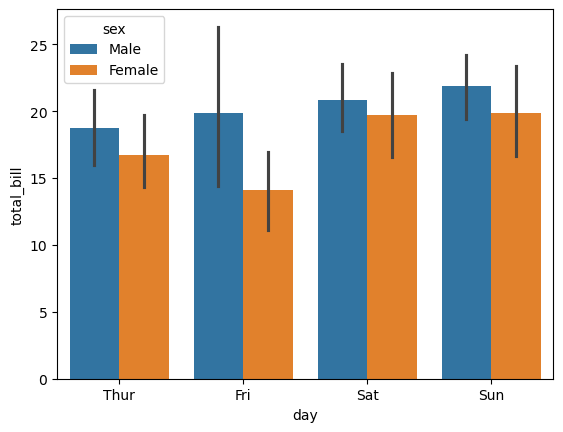

In [78]:
sns.barplot(data=tips, y='total_bill', x='day', hue='sex')

<Axes: xlabel='day', ylabel='total_bill'>

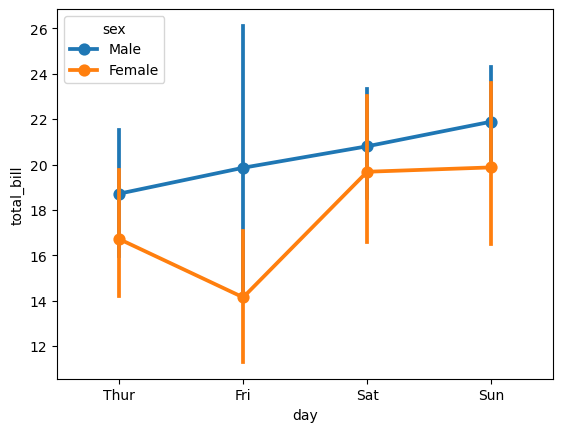

In [79]:
sns.pointplot(data=tips, y='total_bill', x='day', hue='sex')

### Ящик с усами

<Axes: xlabel='day', ylabel='total_bill'>

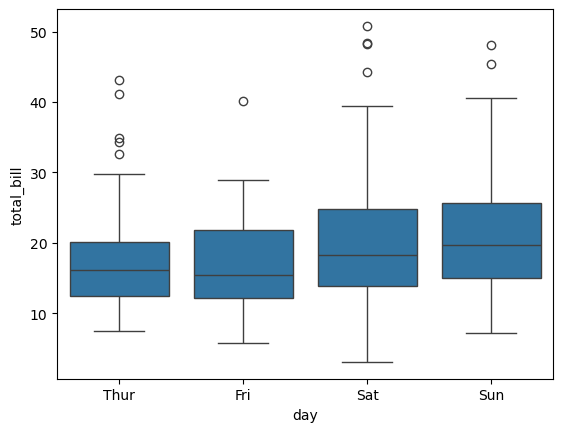

In [80]:
sns.boxplot(data=tips, y='total_bill', x='day')

### Скрипичная диаграмма

<Axes: xlabel='day', ylabel='total_bill'>

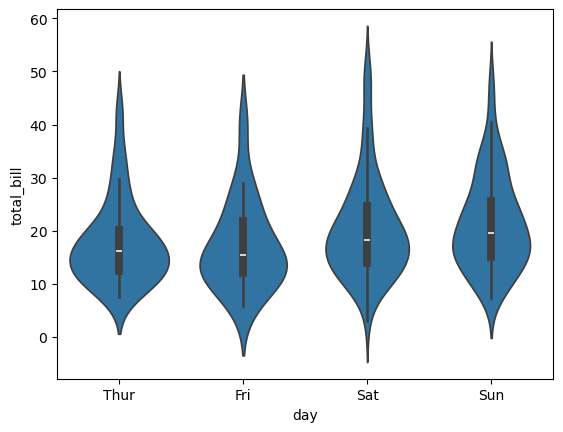

In [81]:
sns.violinplot(data=tips, y='total_bill', x='day')

### Одномерная диаграмма рассеяния

<Axes: xlabel='day', ylabel='total_bill'>

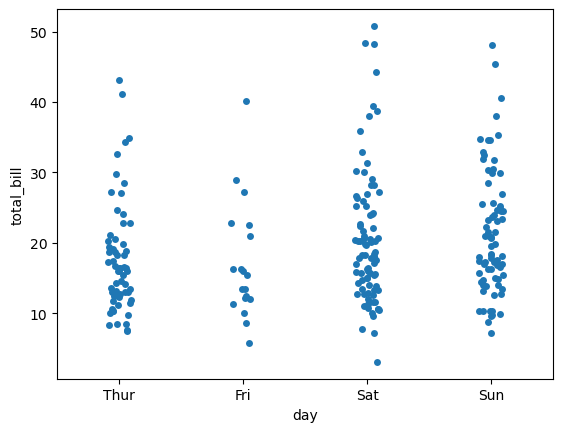

In [82]:
sns.stripplot(data=tips, y='total_bill', x='day')